<a href="https://colab.research.google.com/github/JosephRidge/prep/blob/feature-attrition/Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Refer to the attrition dataset.**
> - Reflecting on our course and working on your Colab Notebook apply what you learned to this dataset (30 points)
> - Data Cleaning - How would you validate that the data is clean.
Include the code to validate this.
> - Data Analysis:
- How would you **explore** the data for further analysis? Include
code for the **EDA**
- Which **visualizations** would be most useful for this dataset?
iii. **Machine Learning** - How could **machine learning** be useful in
exploring this dataset?

Target Dataset:  Employee Attrition(drop)

# Import Libararies

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

# Sentiment Analysis?

## Read Data

In [263]:
employee_att_df = pd.read_csv("https://raw.githubusercontent.com/JosephRidge/prep/main/Employee-Attritionv1.csv")
employee_att_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Data Understanding**
- Shape
- Data types
- Missing Values
- Outliers
- Descriptive statistics
- Exploration (Univariate & Bivariate Analysis)

In [264]:
employee_att_df.shape

(1470, 35)

**Deduction:**
- The data set contains 1470 rows and 35 features/ columns

In [265]:
# Data types
employee_att_df.dtypes

# there exists objects hence we can change them to category type data
employee_att_df['Attrition'] = employee_att_df['Attrition'].astype('category')
employee_att_df['BusinessTravel'] = employee_att_df['BusinessTravel'].astype('category')
employee_att_df['Department'] = employee_att_df['Department'].astype('category')
employee_att_df['EducationField'] = employee_att_df['EducationField'].astype('category')
employee_att_df['JobRole'] = employee_att_df['JobRole'].astype('category')
employee_att_df['MaritalStatus'] = employee_att_df['MaritalStatus'].astype('category')
employee_att_df['Over18'] = employee_att_df['Over18'].astype('category')
employee_att_df['OverTime'] = employee_att_df['OverTime'].astype('category')
employee_att_df['Gender'] = employee_att_df['Gender'].astype('category')
employee_att_df.dtypes


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

**Deduction:**
- The data set is composed of both catgorial and numerical data

### **Check for Missing Values**

In [266]:
employee_att_df.isna().sum()*100/len(employee_att_df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

**Deduction:**
- No outliers exist

### **Check for Outliers**

#### **1. Using Box Plots**

Age                             Axes(0.125,0.77;0.110714x0.11)
DailyRate                    Axes(0.257857,0.77;0.110714x0.11)
DistanceFromHome             Axes(0.390714,0.77;0.110714x0.11)
Education                    Axes(0.523571,0.77;0.110714x0.11)
EmployeeCount                Axes(0.656429,0.77;0.110714x0.11)
EmployeeNumber               Axes(0.789286,0.77;0.110714x0.11)
EnvironmentSatisfaction        Axes(0.125,0.638;0.110714x0.11)
HourlyRate                  Axes(0.257857,0.638;0.110714x0.11)
JobInvolvement              Axes(0.390714,0.638;0.110714x0.11)
JobLevel                    Axes(0.523571,0.638;0.110714x0.11)
JobSatisfaction             Axes(0.656429,0.638;0.110714x0.11)
MonthlyIncome               Axes(0.789286,0.638;0.110714x0.11)
MonthlyRate                    Axes(0.125,0.506;0.110714x0.11)
NumCompaniesWorked          Axes(0.257857,0.506;0.110714x0.11)
PercentSalaryHike           Axes(0.390714,0.506;0.110714x0.11)
PerformanceRating           Axes(0.523571,0.506;0.11071

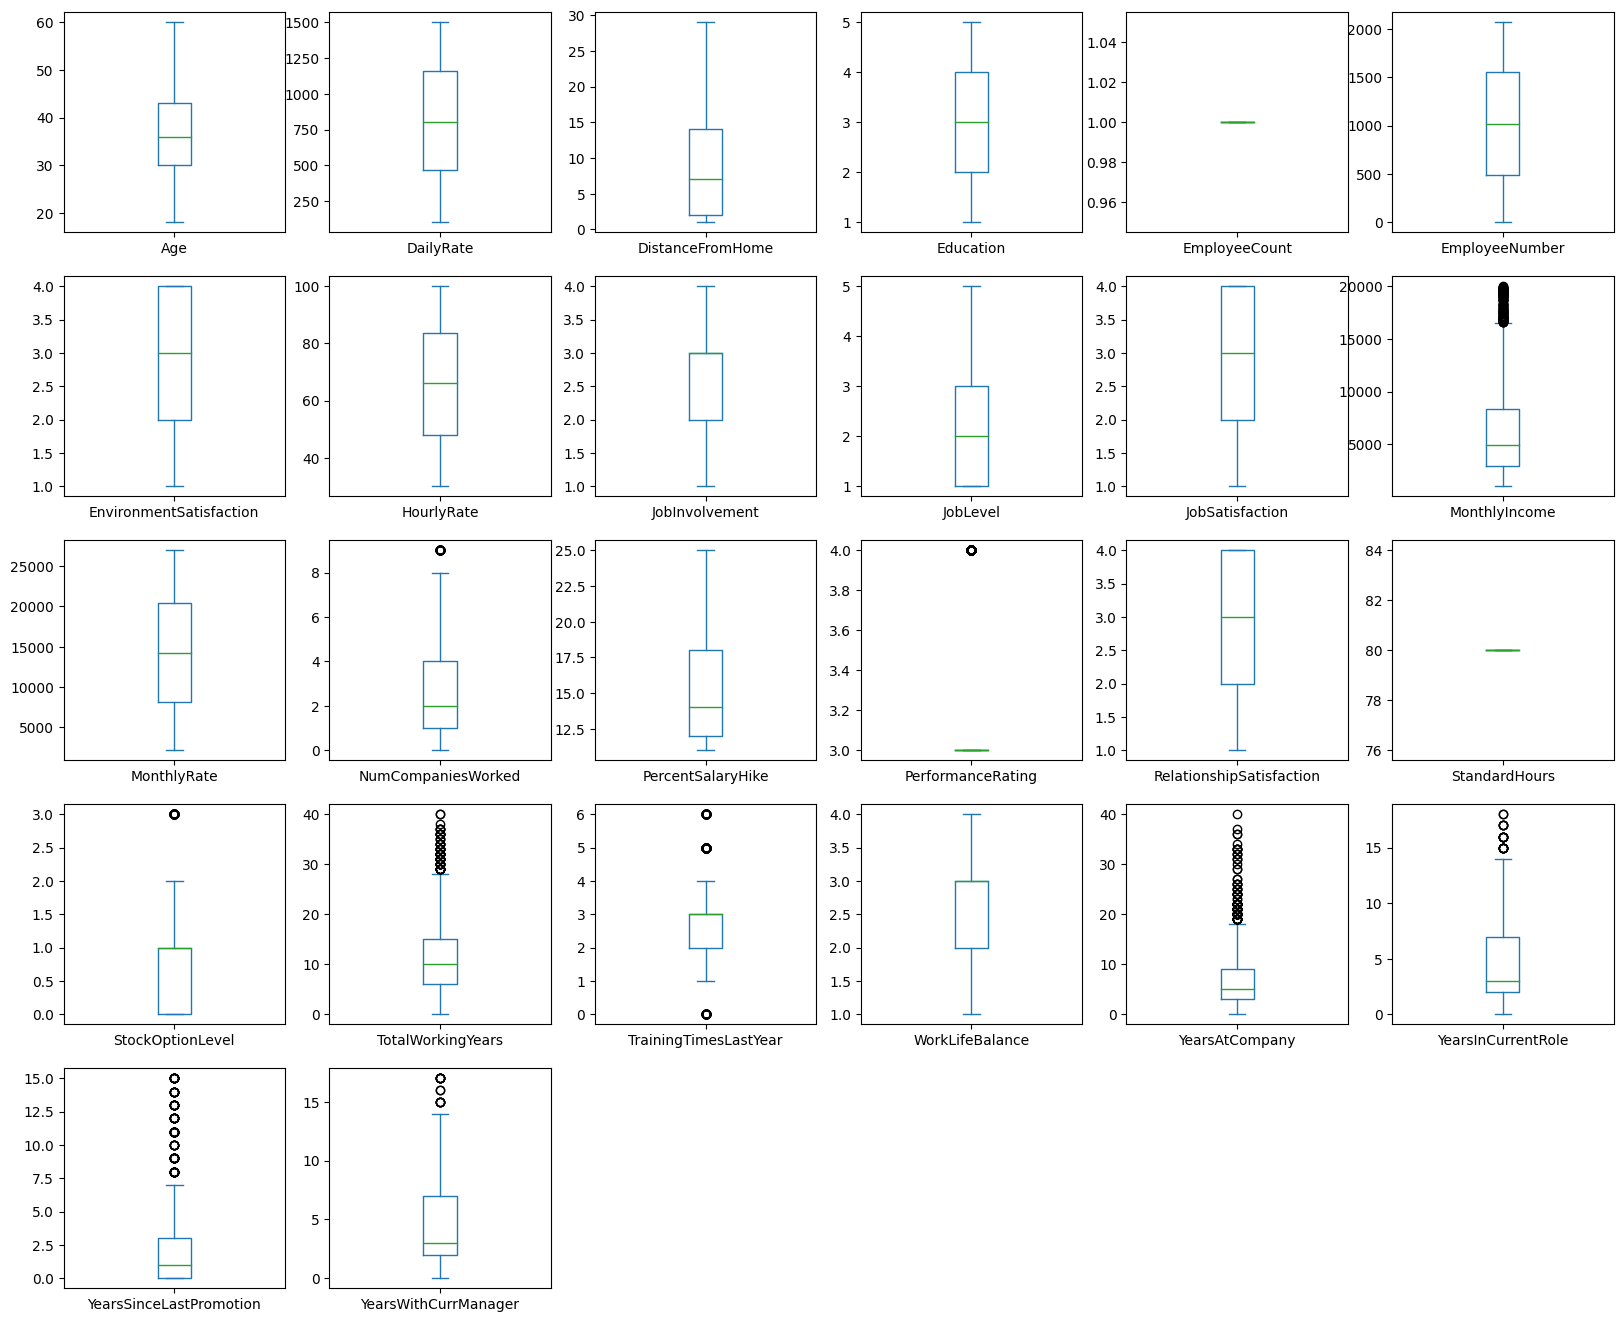

In [267]:
employee_att_df.plot(kind='box',figsize=(20,20),layout=(6,6),subplots=True,sharex=False)

**Deduction:**
> The Following features contain outliers:
- MonthlyIncome
- NumberOfWorkers
- NumberOfCompanies Worked
- TotalWorkingYears
- YearsSinceLastPromotions
- YearsAtCompany
- YearsWithCurrManager
- YearsInCurrentRole
- TrainingTimesLastYear

> Possible Considerations:
- Data Removal
- Imputation



### **Descriptive Statistics**

In [268]:
employee_att_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **Univariate Analysis**

In [269]:
# Dropping first irrelevant features:
target_columns = ['EmployeeCount','EmployeeNumber']
employee_att_df= employee_att_df.drop (columns = target_columns)

In [270]:
# Univariate Analysis - targeting single columns,Numerical Data ( hist & Density Plot)
def univariateAnalysis(df, name):
  # describe
  df.describe()
  # plot density plot - provides estimate of data pdf
  df.plot(kind='density', figsize = (6,6), title="Density Plot of "+name, color='blue')
  # plot Histogram - display distribution
  df.hist(figsize = (6,6), color='blue')
  plt.title(name)
  plt.grid(False)
  plt.show()
  df.plot()

def checkType(feature):
  data_type = feature.dtype
  if data_type == 'int64':
    return True
  else:
    return False

def describeFeature(feature):
  ds = feature.describe()
  if(len(ds) >4):
    print(f'----------------- {feature} Summary ---------------------------')
    print(f' Mean  : {ds[1]}')
    print(f' Standard Deviation  : {ds[2]}')
    print(f' Lowest Value  : {ds[3]}')
    print(f' Largest Value  : {ds[7]}')
    print(f'---------------------------------------------------------------')



features = employee_att_df.columns


----------------- 0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 36.923809523809524
 Standard Deviation  : 9.135373489136732
 Lowest Value  : 18.0
 Largest Value  : 60.0
---------------------------------------------------------------


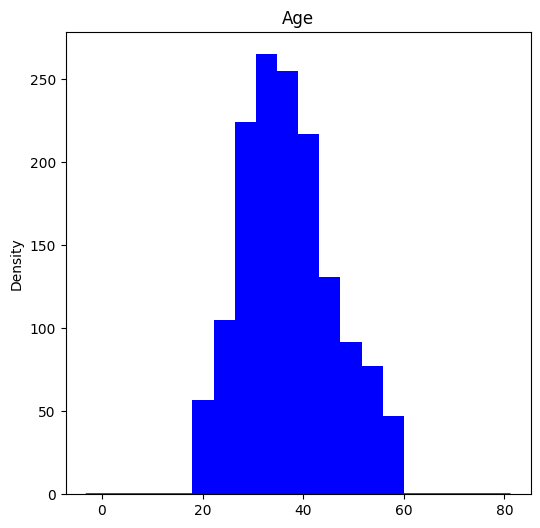

----------------- 0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 802.4857142857143
 Standard Deviation  : 403.50909994352816
 Lowest Value  : 102.0
 Largest Value  : 1499.0
---------------------------------------------------------------


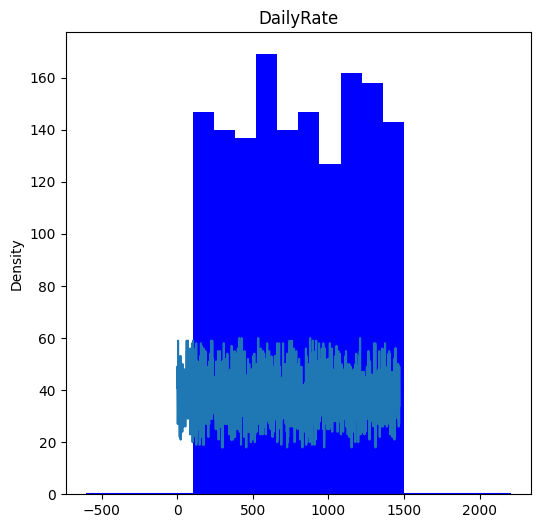

----------------- 0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 9.19251700680272
 Standard Deviation  : 8.106864435666074
 Lowest Value  : 1.0
 Largest Value  : 29.0
---------------------------------------------------------------


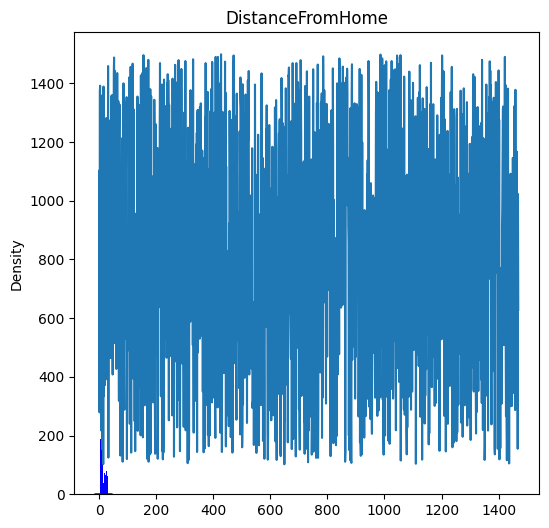

----------------- 0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.912925170068027
 Standard Deviation  : 1.0241649445978729
 Lowest Value  : 1.0
 Largest Value  : 5.0
---------------------------------------------------------------


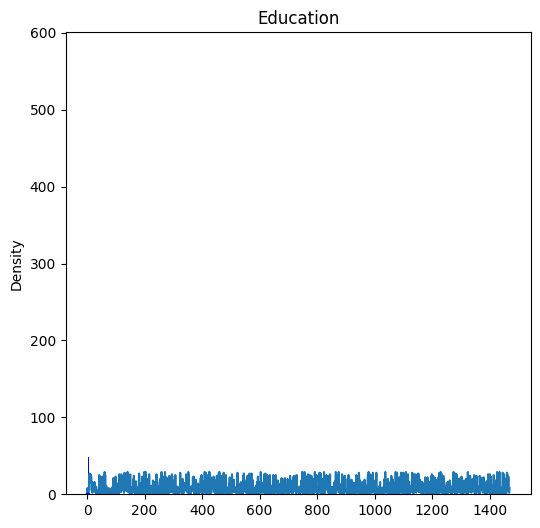

----------------- 0       2
1       3
2       4
3       4
4       1
       ..
1465    3
1466    4
1467    2
1468    4
1469    2
Name: EnvironmentSatisfaction, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.721768707482993
 Standard Deviation  : 1.0930822146350005
 Lowest Value  : 1.0
 Largest Value  : 4.0
---------------------------------------------------------------


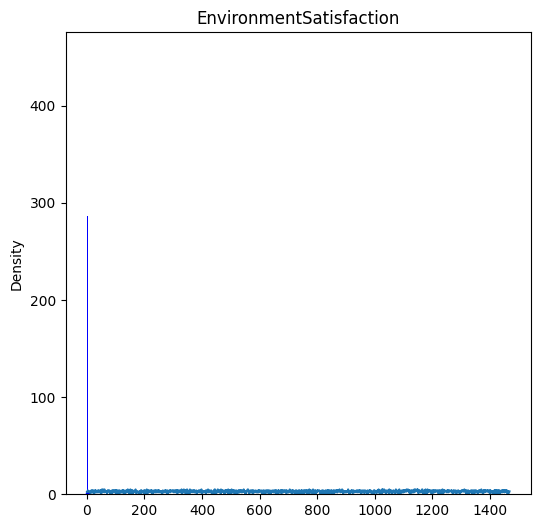

----------------- 0       94
1       61
2       92
3       56
4       40
        ..
1465    41
1466    42
1467    87
1468    63
1469    82
Name: HourlyRate, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 65.89115646258503
 Standard Deviation  : 20.329427593996165
 Lowest Value  : 30.0
 Largest Value  : 100.0
---------------------------------------------------------------


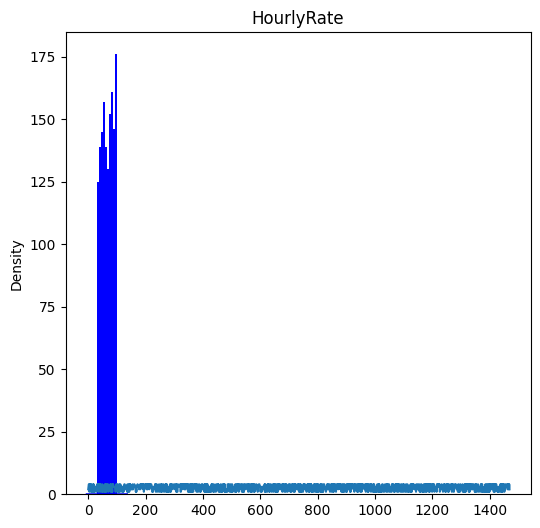

----------------- 0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.7299319727891156
 Standard Deviation  : 0.7115611429632304
 Lowest Value  : 1.0
 Largest Value  : 4.0
---------------------------------------------------------------


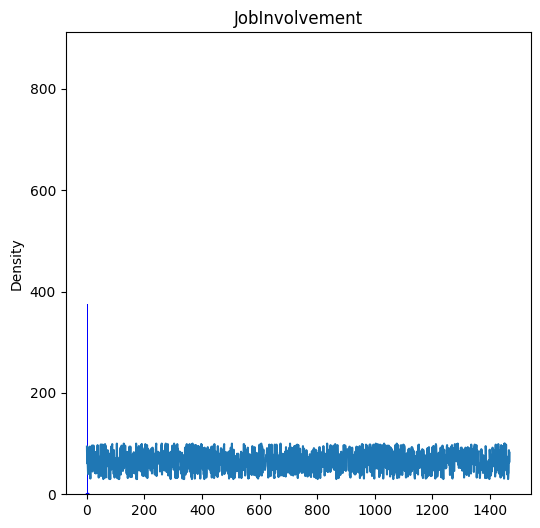

----------------- 0       2
1       2
2       1
3       1
4       1
       ..
1465    2
1466    3
1467    2
1468    2
1469    2
Name: JobLevel, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.0639455782312925
 Standard Deviation  : 1.106939898935122
 Lowest Value  : 1.0
 Largest Value  : 5.0
---------------------------------------------------------------


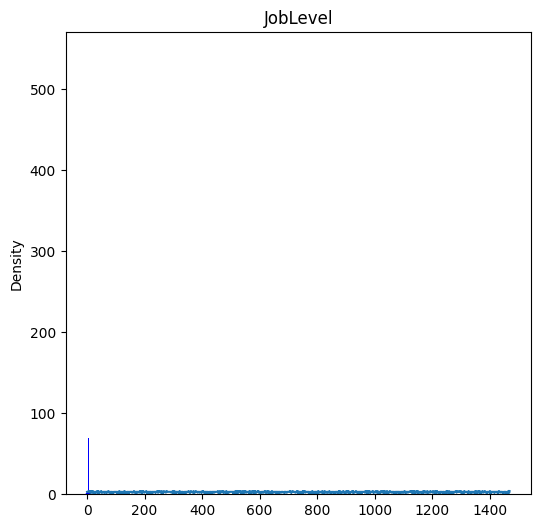

----------------- 0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.7285714285714286
 Standard Deviation  : 1.1028461230547204
 Lowest Value  : 1.0
 Largest Value  : 4.0
---------------------------------------------------------------


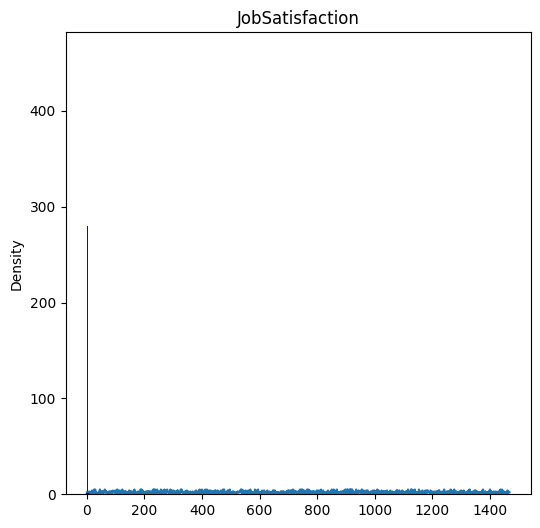

----------------- 0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 6502.931292517007
 Standard Deviation  : 4707.956783097994
 Lowest Value  : 1009.0
 Largest Value  : 19999.0
---------------------------------------------------------------


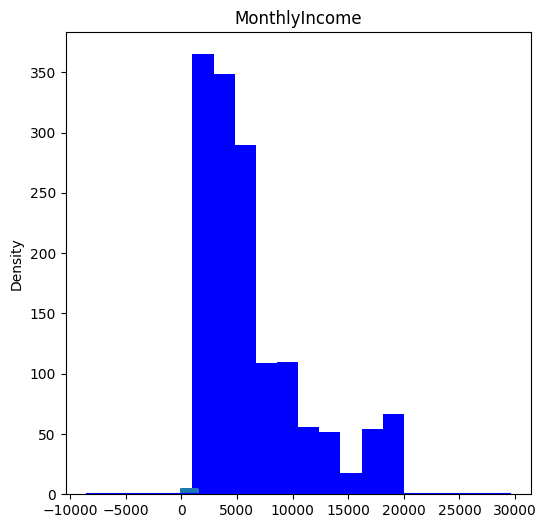

----------------- 0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 14313.103401360544
 Standard Deviation  : 7117.786044059976
 Lowest Value  : 2094.0
 Largest Value  : 26999.0
---------------------------------------------------------------


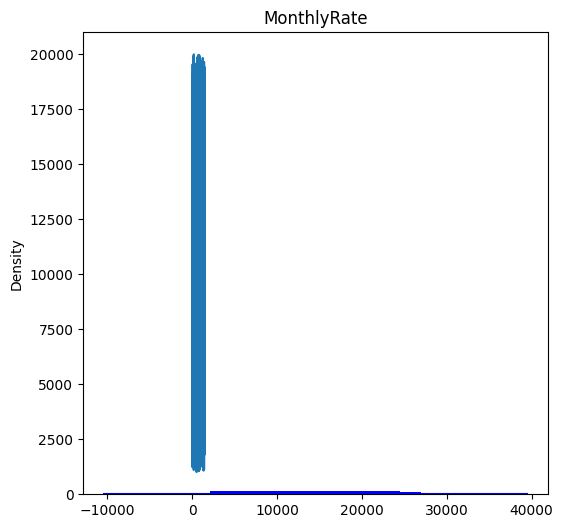

----------------- 0       8
1       1
2       6
3       1
4       9
       ..
1465    4
1466    4
1467    1
1468    2
1469    2
Name: NumCompaniesWorked, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.6931972789115646
 Standard Deviation  : 2.498009006070747
 Lowest Value  : 0.0
 Largest Value  : 9.0
---------------------------------------------------------------


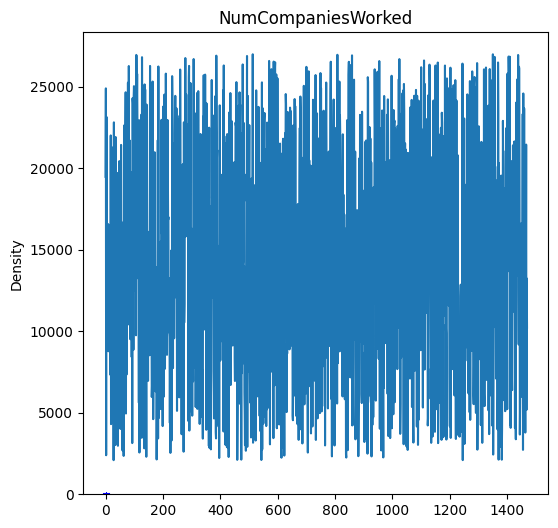

----------------- 0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: PercentSalaryHike, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 15.209523809523809
 Standard Deviation  : 3.6599377165396407
 Lowest Value  : 11.0
 Largest Value  : 25.0
---------------------------------------------------------------


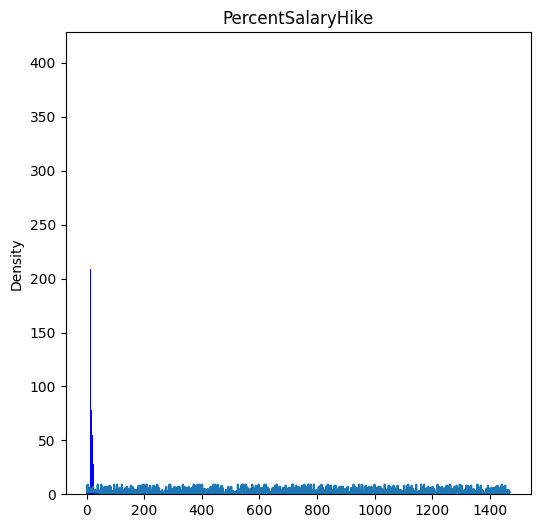

----------------- 0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 3.1537414965986397
 Standard Deviation  : 0.36082352460434397
 Lowest Value  : 3.0
 Largest Value  : 4.0
---------------------------------------------------------------


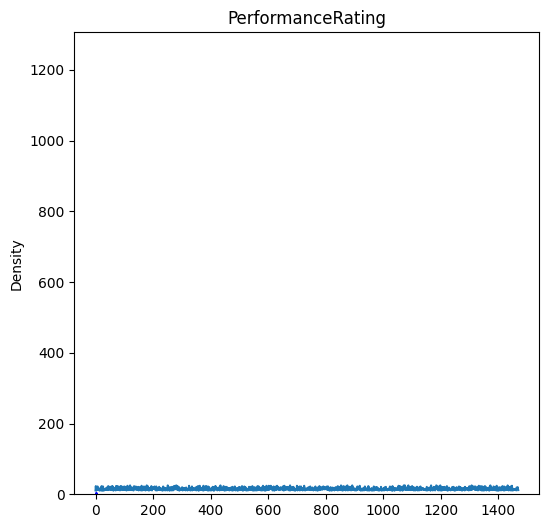

----------------- 0       1
1       4
2       2
3       3
4       4
       ..
1465    3
1466    1
1467    2
1468    4
1469    1
Name: RelationshipSatisfaction, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.7122448979591836
 Standard Deviation  : 1.0812088864403524
 Lowest Value  : 1.0
 Largest Value  : 4.0
---------------------------------------------------------------


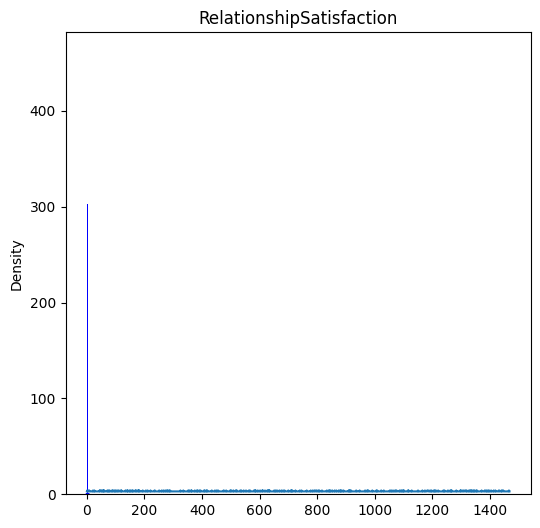

----------------- 0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 80.0
 Standard Deviation  : 0.0
 Lowest Value  : 80.0
 Largest Value  : 80.0
---------------------------------------------------------------


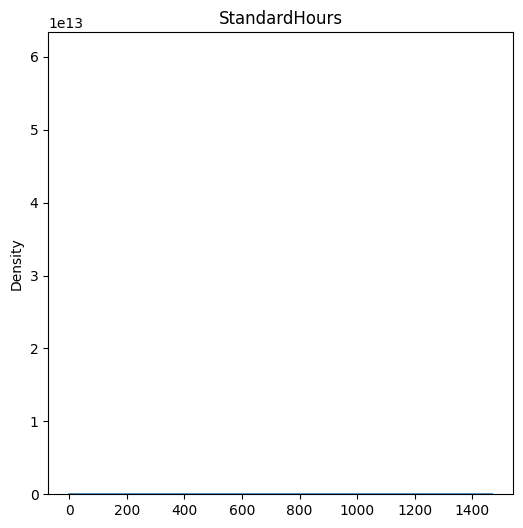

----------------- 0       0
1       1
2       0
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    0
1469    0
Name: StockOptionLevel, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 0.7938775510204081
 Standard Deviation  : 0.852076667930838
 Lowest Value  : 0.0
 Largest Value  : 3.0
---------------------------------------------------------------


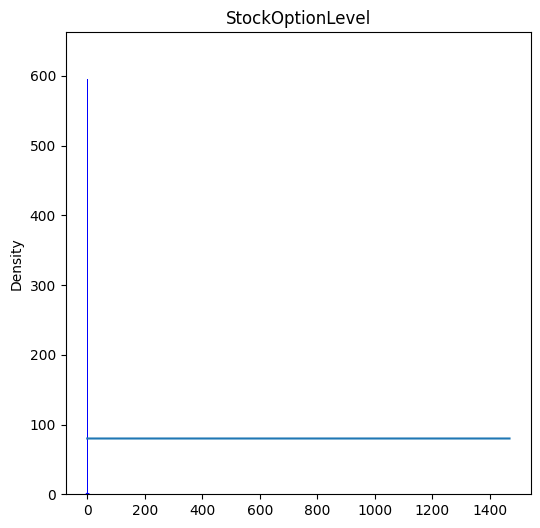

----------------- 0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 11.279591836734694
 Standard Deviation  : 7.780781675514997
 Lowest Value  : 0.0
 Largest Value  : 40.0
---------------------------------------------------------------


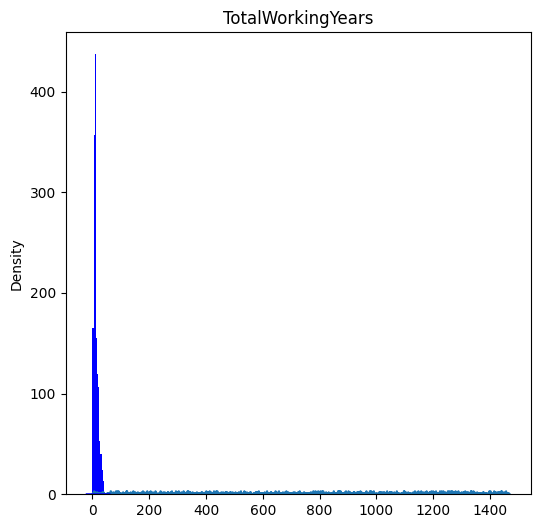

----------------- 0       0
1       3
2       3
3       3
4       3
       ..
1465    3
1466    5
1467    0
1468    3
1469    3
Name: TrainingTimesLastYear, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.7993197278911564
 Standard Deviation  : 1.2892706207958455
 Lowest Value  : 0.0
 Largest Value  : 6.0
---------------------------------------------------------------


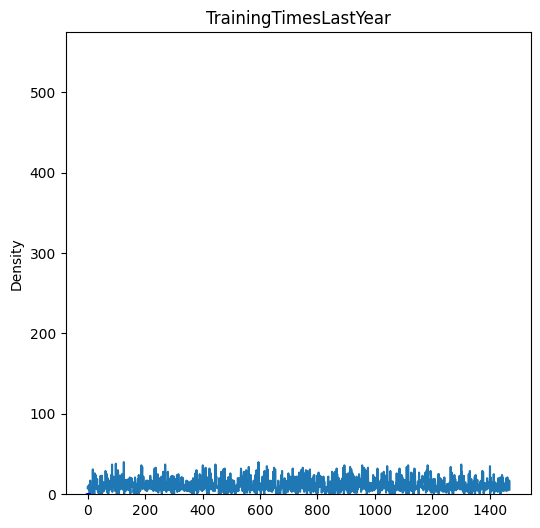

----------------- 0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.7612244897959184
 Standard Deviation  : 0.7064758297141507
 Lowest Value  : 1.0
 Largest Value  : 4.0
---------------------------------------------------------------


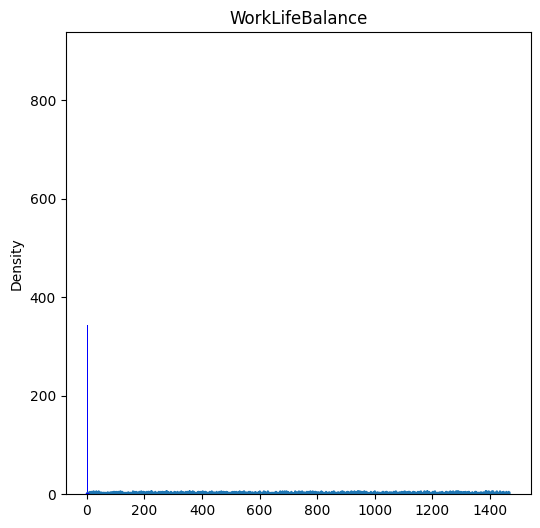

----------------- 0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 7.0081632653061225
 Standard Deviation  : 6.126525152403569
 Lowest Value  : 0.0
 Largest Value  : 40.0
---------------------------------------------------------------


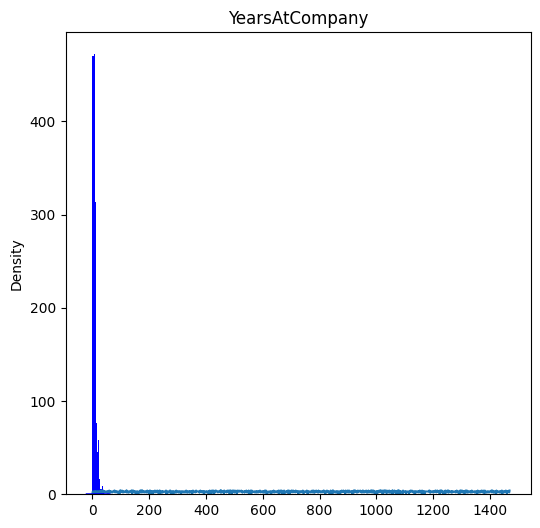

----------------- 0       4
1       7
2       0
3       7
4       2
       ..
1465    2
1466    7
1467    2
1468    6
1469    3
Name: YearsInCurrentRole, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 4.229251700680272
 Standard Deviation  : 3.623137034670628
 Lowest Value  : 0.0
 Largest Value  : 18.0
---------------------------------------------------------------


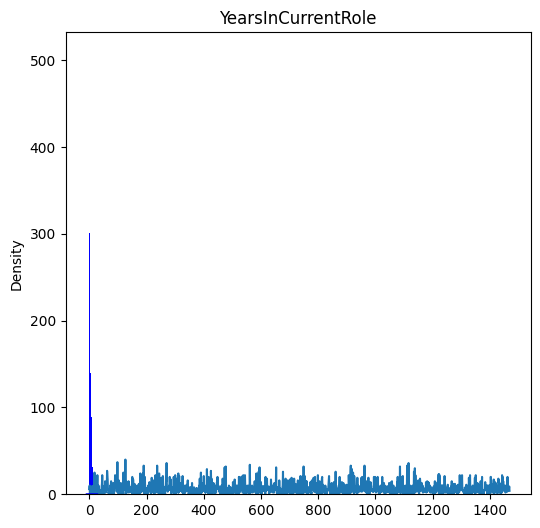

----------------- 0       0
1       1
2       0
3       3
4       2
       ..
1465    0
1466    1
1467    0
1468    0
1469    1
Name: YearsSinceLastPromotion, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 2.1877551020408164
 Standard Deviation  : 3.222430279137967
 Lowest Value  : 0.0
 Largest Value  : 15.0
---------------------------------------------------------------


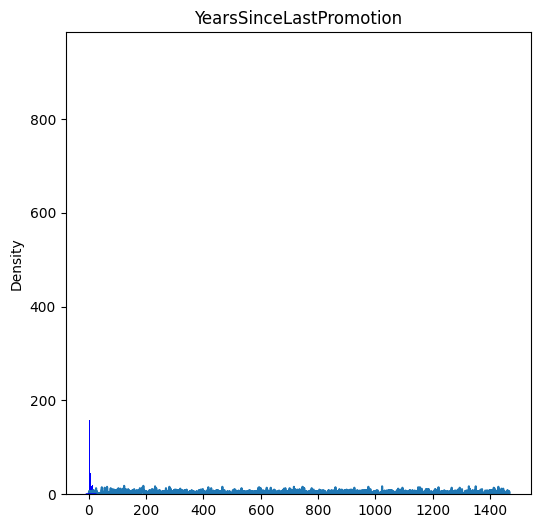

----------------- 0       5
1       7
2       0
3       0
4       2
       ..
1465    3
1466    7
1467    3
1468    8
1469    2
Name: YearsWithCurrManager, Length: 1470, dtype: int64 Summary ---------------------------
 Mean  : 4.12312925170068
 Standard Deviation  : 3.5681361205404376
 Lowest Value  : 0.0
 Largest Value  : 17.0
---------------------------------------------------------------


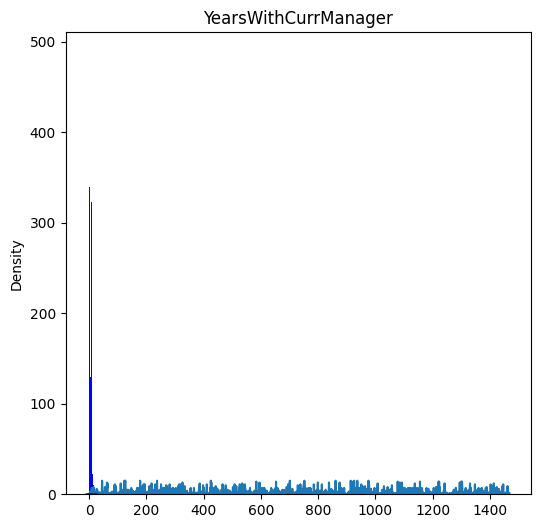

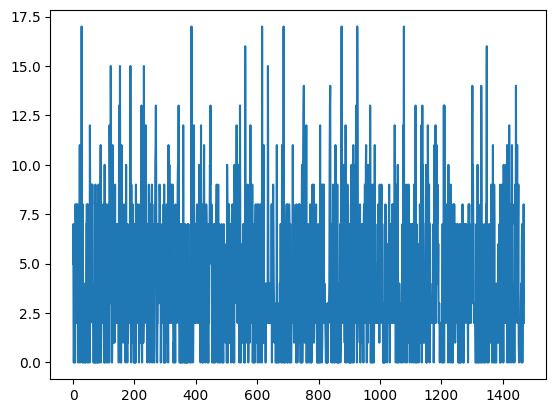

In [271]:
for feature in features:
  # check dtype accept if numeric alone
  dataType = checkType(employee_att_df[feature])
  # describe data
  describeFeature(employee_att_df[feature])
  if dataType:
    # visualization of feature
     univariateAnalysis(employee_att_df[feature], feature)


## **Bi-variate Analysis**

In [272]:
categorical_data=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

In [273]:

#  object to replace the values
attrition_replace_values = { 'Yes':1, 'No':0}
employee_att_df['Attrition'] = employee_att_df['Attrition'].replace(attrition_replace_values)
employee_att_df['Attrition']=employee_att_df['Attrition'].astype('int64')

In [274]:
#  object to replace the values
travel_replace_values = { 'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':3 }
employee_att_df['BusinessTravel'] = employee_att_df['BusinessTravel'].replace(travel_replace_values)
employee_att_df['BusinessTravel'].dtypes
employee_att_df['BusinessTravel']=employee_att_df['BusinessTravel'].astype('int64')

In [275]:
department_replace_values = { 'Sales':1, 'Research & Development':2, 'Human Resources':3 }
employee_att_df['Department'] = employee_att_df['Department'].replace(department_replace_values)
employee_att_df['Department'].unique()
employee_att_df['Department']=employee_att_df['Department'].astype('int64')

In [276]:
edu_replace_values = { 'Life Sciences':1, 'Other':2, 'Medical':3 ,'Marketing':4,'Technical Degree':5, 'Human Resources':6}
employee_att_df['EducationField'] = employee_att_df['EducationField'].replace(edu_replace_values)
employee_att_df['EducationField'].unique()
employee_att_df['EducationField']=employee_att_df['EducationField'].astype('int64')

In [277]:
gender_replace_values = { 'Female':1, 'Male':0}
employee_att_df['Gender'] = employee_att_df['Gender'].replace(gender_replace_values)
employee_att_df['Gender'].unique()
employee_att_df['Gender']=employee_att_df['Gender'].astype('int64')

In [278]:
job_role_replace_values = { 'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician':3, 'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6, 'Sales Representative':7, 'Research Director':8, 'Human Resources':9}
employee_att_df['JobRole'] = employee_att_df['JobRole'].replace(job_role_replace_values)
employee_att_df['JobRole'].unique()
employee_att_df['JobRole']=employee_att_df['JobRole'].astype('int64')

In [279]:
marital_replace_values = { 'Single':1, 'Married':2, 'Divorced':3}
employee_att_df['MaritalStatus'] = employee_att_df['MaritalStatus'].replace(marital_replace_values)
employee_att_df['MaritalStatus'].unique()
employee_att_df['MaritalStatus']=employee_att_df['MaritalStatus'].astype('int64')

In [280]:
over18_replace_values = { 'Y':1, 'N':2 }
employee_att_df['Over18'] = employee_att_df['Over18'].replace(over18_replace_values)
employee_att_df['Over18'].unique()
employee_att_df['Over18']=employee_att_df['Over18'].astype('int64')

In [281]:
#  object to replace the values
overtime_replace_values = { 'Yes':1, 'No':0}
employee_att_df['OverTime'] = employee_att_df['OverTime'].replace(overtime_replace_values)
employee_att_df['OverTime'].unique()
employee_att_df['OverTime']=employee_att_df['OverTime'].astype('int64')

In [282]:
employee_att_df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

In [284]:
# Calculate correlation matrix
correlation_matrix = np.corrcoef(employee_att_df, rowvar=False)
print(correlation_matrix)

[[ 1.00000000e+00 -1.59205007e-01 -2.47514342e-02 ...  2.12901056e-01
   2.16513368e-01  2.02088602e-01]
 [-1.59205007e-01  1.00000000e+00 -7.37769460e-05 ... -1.60545004e-01
  -3.30187751e-02 -1.56199316e-01]
 [-2.47514342e-02 -7.37769460e-05  1.00000000e+00 ...  1.14974471e-02
   3.25911529e-02  2.26357345e-02]
 ...
 [ 2.12901056e-01 -1.60545004e-01  1.14974471e-02 ...  1.00000000e+00
   5.48056248e-01  7.14364762e-01]
 [ 2.16513368e-01 -3.30187751e-02  3.25911529e-02 ...  5.48056248e-01
   1.00000000e+00  5.10223636e-01]
 [ 2.02088602e-01 -1.56199316e-01  2.26357345e-02 ...  7.14364762e-01
   5.10223636e-01  1.00000000e+00]]


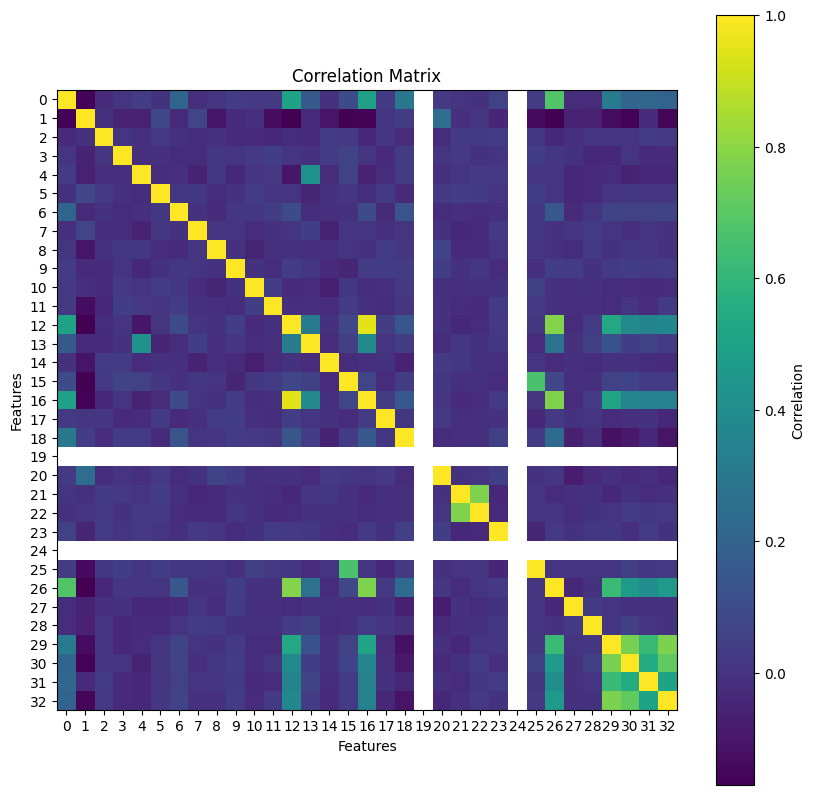

In [286]:
# Correlation Matrix
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(employee_att_df.shape[1]), labels=np.arange(employee_att_df.shape[1]))
plt.yticks(ticks=np.arange(employee_att_df.shape[1]), labels=np.arange(employee_att_df.shape[1]))
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()